In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/lab6')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/lab6


In [2]:
import time
import glob
import numpy as np
import pandas as pd
from skimage import io # To read image
from skimage.transform import resize # To resize image
from skimage.color import rgb2gray # To grayscale
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [3]:
def read_images(image_path, width=224, height=224):
    
    
    # Opening an image using skimage
    img = io.imread(image_path)
    

    img_green = img[:,:,2]
    img_red = img[:,:,3]
    img_NIR = img[:,:,7]

    img_comp = np.dstack((img_green, img_red, img_NIR))

    #img_gray = rgb2gray(img_comp)
        
    # Resize the image
    img_resize = resize(img_comp, (width, height))
    
    # Get the label of the image
    label = os.path.basename(image_path)[:-8]
    
    return img_resize, label

In [4]:
image_paths = glob.glob(r"/content/drive/MyDrive/lab6/data_EuroSAT/*/*")
image_paths

['/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_457.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_456.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_461.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_451.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_460.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_455.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_454.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_452.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_447.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_459.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_458.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_466.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_467.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_473.tif',
 '/content/drive/MyDrive/lab6/data_EuroSAT/Forest/Forest_489.t

In [5]:
%%time

# Create two empty lists that will store the images and labels while we loop
images = []
labels = []

# Run the loop and keep storing the data
for image_path in image_paths:
    image, label = read_images(image_path)
    images.append(image)
    labels.append(label)

CPU times: user 47.5 s, sys: 2min 57s, total: 3min 45s
Wall time: 13min 36s


In [6]:
X = np.array(images)
X = X/32768
y = np.array(labels)

In [7]:
# Check the shape of X and y
print(X.shape)
print(y.shape)

(1858, 224, 224, 3)
(1858,)


In [8]:
# Encode y label, convert the string label to integers
enc = LabelEncoder()

enc.fit(y)

y_enc = enc.transform(y)
n_classes = len(list(np.unique(y_enc)))

y_1hot = to_categorical(y_enc, n_classes)


print("Encoded Values")
print(np.arange(0, n_classes))
print(list(enc.inverse_transform(np.arange(0, n_classes))))

Encoded Values
[0 1 2 3 4 5 6]
['Forest', 'Industrial', 'PermanentCr', 'PermanentCro', 'PermanentCrop', 'Residential', 'River']


In [9]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_1hot, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Check Min Max of Xs
print("Max of X_train: ", np.max(X_train))
print("Min of X_train: ", np.min(X_train))
print("Max of X_test: ", np.max(X_test))
print("Min of X_test: ", np.min(X_test))

(1300, 224, 224, 3)
(1300, 7)
(558, 224, 224, 3)
(558, 7)
Max of X_train:  1.2944992107981304e-05
Min of X_train:  6.196715827624825e-08
Max of X_test:  1.3039159285279043e-05
Min of X_test:  5.7027747109305606e-08


In [10]:
X_train = X_train.reshape(1300, 224, 224, 3) # adding a dummy demnsion to inidcate there is one channel.
X_test = X_test.reshape(558, 224, 224, 3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1300, 224, 224, 3)
(1300, 7)
(558, 224, 224, 3)
(558, 7)


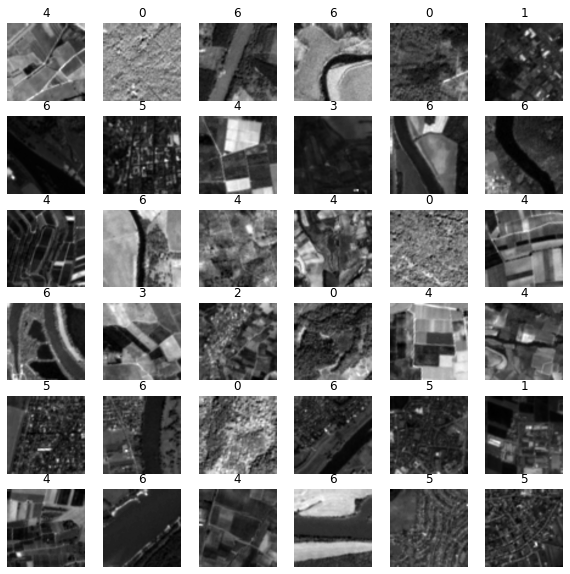

In [11]:
fig, ax = plt.subplots(6, 6, figsize=(10, 10))

count = 0

for i in range(6):
    for j in range(6):
        
        if count > 36:
            break
        
        ax[i,j].imshow(X_train[count, :, :, 0], cmap='gray')  #Plot
        ax[i,j].set_title(np.argmax(y_train[count])) # Give title
        
        ax[i,j].axis('off') # Turn off axis
        
        count = count + 1

plt.show()

In [12]:
%%time
np.save(r'eurosat_X_train.npy', X_train)
np.save(r'eurosat_X_test.npy', X_test)
np.save(r'eurosat_y_train.npy', y_train)
np.save(r'eurosat_y_test.npy', y_test)

CPU times: user 294 ms, sys: 1.53 s, total: 1.82 s
Wall time: 46.8 s
